In [126]:
import numpy as np
import matplotlib.pyplot as plt

input_dir = './residuals/'
output_dir = './residuals/'
filename = '06 04 2022 frog 2 LE 15 red flash w2 0_0 P3_P2.txt'
indexes_to_delete1 = [17, 18, 19, 20] # номера неудачных точек (перечислить через запятую, нумерация с 1)
indexes_to_delete2 = [15, 17, 18, 19, 20] # номера неудачных точек (перечислить через запятую, нумерация с 1)

y1, y2 = [], []
with open(input_dir + filename, 'r', encoding='utf-8') as file:
    line = file.readline()
    while line:
        cols = line.rstrip().replace(',', '.').split('\t')
        y1.append(float(cols[1]))
        y2.append(float(cols[3]))
        line = file.readline()

In [127]:
n = len(y1)
x1 = np.array(range(1, n + 1))
y1 = np.array(y1)
x2 = np.array(range(1, n + 1))
y2 = np.array(y2)

In [128]:
print('Input')
for i in range(n):
        print(f'{i + 1}\t{y1[i]:.5f}\t{y2[i]:.5f}')

Input
1	-0.00489	0.05758
2	-0.00214	0.05866
3	-0.00512	0.04503
4	-0.00626	0.05865
5	-0.00696	0.06575
6	-0.00761	0.07305
7	-0.00409	0.07535
8	-0.00460	0.07860
9	-0.00436	0.07703
10	-0.00460	0.07565
11	-0.00820	0.08097
12	-0.00444	0.08327
13	-0.00587	0.08923
14	-0.00293	0.08784
15	-0.00026	0.20086
16	-0.00005	0.08589
17	0.00000	0.00000
18	0.00000	0.00000
19	0.00000	0.00000
20	0.00000	0.00000


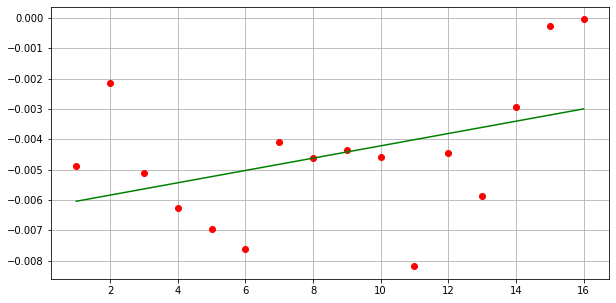

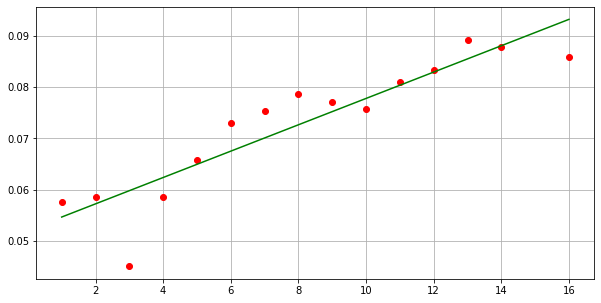

In [129]:
indexes_to_delete1 = [num - 1 for num in indexes_to_delete1]
x1 = np.delete(x1, indexes_to_delete1)
y1 = np.delete(y1, indexes_to_delete1)
indexes_to_delete2 = [num - 1 for num in indexes_to_delete2]
x2 = np.delete(x2, indexes_to_delete2)
y2 = np.delete(y2, indexes_to_delete2)

s = np.polynomial.polynomial.Polynomial.fit(x1, y1, 1).convert().coef
k, b = s[1], s[0]
trend1 = k * x1 + b
residuals1 = dict()
for i in range(x1.size):
    residuals1[x1[i]] = y1[i] - trend1[i]

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
ax.plot(x1, y1, 'ro')
ax.plot(x1, trend1, 'g')
ax.grid()

s = np.polynomial.polynomial.Polynomial.fit(x2, y2, 1).convert().coef
k, b = s[1], s[0]
trend2 = k * x2 + b
residuals2 = dict()
for i in range(x2.size):
    residuals2[x2[i]] = y2[i] - trend2[i]

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
ax.plot(x2, y2, 'ro')
ax.plot(x2, trend2, 'g')
ax.grid()

In [130]:
with open(output_dir + filename[:-3] + '_out' + '.txt', 'w', encoding='utf-8') as file:
    print('Residuals')
    for i in range(1, n + 1):
        num1 = f'{residuals1[i]:.5f}' if i in residuals1 else ''
        num2 = f'{residuals2[i]:.5f}' if i in residuals2 else ''
        print(f'{i}\t{num1}\t{num2}')
        file.write(f'{i}\t{num1}\t{num2}\n')

Residuals
1	0.00116	0.00291
2	0.00370	0.00142
3	0.00052	-0.01478
4	-0.00082	-0.00373
5	-0.00172	0.00080
6	-0.00258	0.00553
7	0.00074	0.00525
8	0.00002	0.00594
9	0.00006	0.00179
10	-0.00038	-0.00215
11	-0.00418	0.00059
12	-0.00063	0.00032
13	-0.00226	0.00371
14	0.00048	-0.00025
15	0.00295	
16	0.00295	-0.00735
17		
18		
19		
20		
